In [1]:
import pandas as pd
data = pd.read_csv("forestfires.csv")
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [2]:
print(data.info())
print(data.describe())
print(data.head())
print(data.columns) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900

In [4]:
print(data.isnull().sum())
data = pd.get_dummies(data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


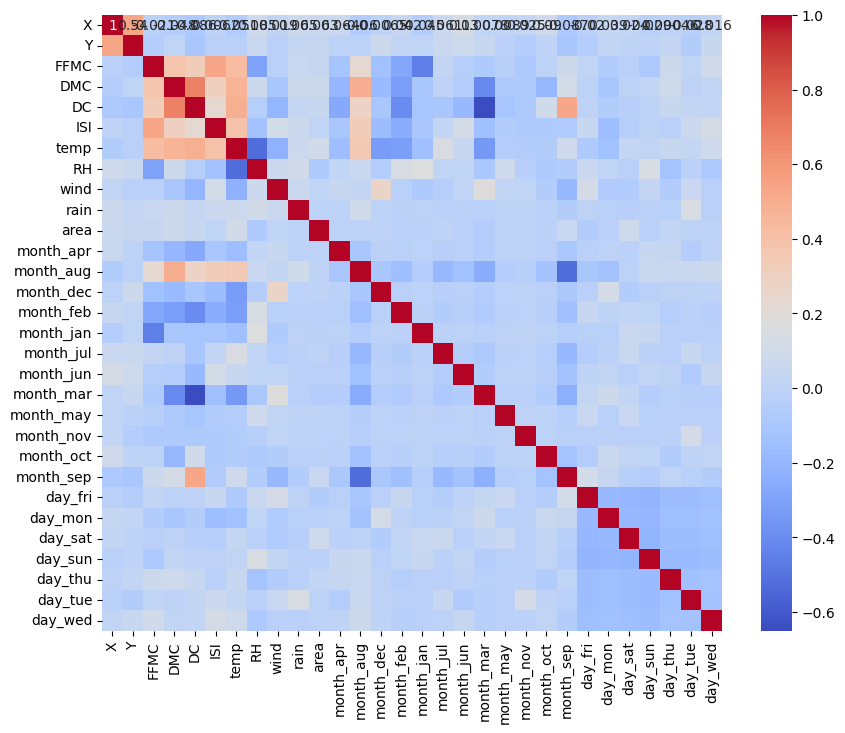

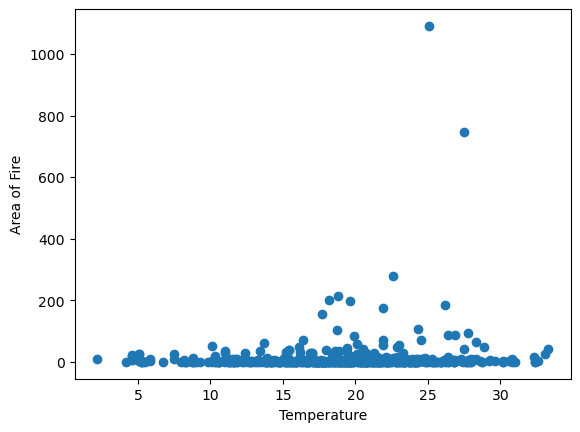

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

plt.scatter(data['temp'], data['area'])
plt.xlabel('Temperature')
plt.ylabel('Area of Fire')
plt.show()


In [50]:
if 'Classes' in data.columns:
    data['Classes'] = data['Classes'].str.strip()
else:
    print("The column 'Classes' does not exist.")

The column 'Classes' does not exist.


In [6]:
X = data.drop('area', axis=1)  
y = data['area']               

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = model.feature_importances_
print(feature_importances)


[4.81090975e-02 5.26539030e-02 4.11439113e-02 1.07694946e-01
 2.56403014e-02 4.99475605e-02 4.24902873e-01 7.54609099e-02
 5.92423618e-02 2.02693367e-05 3.46924425e-04 1.63525433e-02
 6.29637281e-05 4.62152778e-04 4.47020556e-07 1.38582131e-02
 2.07592360e-04 1.83487475e-04 6.98527639e-04 0.00000000e+00
 3.83558102e-04 5.60628506e-03 5.01235069e-04 7.50851888e-03
 2.50041240e-02 3.40361648e-03 2.92746899e-02 6.50975012e-03
 4.81923657e-03]


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


In [54]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R2 Score: {r2}')


MSE: 11894.03253114372, R2 Score: -0.009015316846864074


In [55]:
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train_binary)

y_pred_class = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print(f'Accuracy: {accuracy_score(y_test_binary, y_pred_class)}')
print(classification_report(y_test_binary, y_pred_class))


Accuracy: 0.5673076923076923
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        51
           1       0.57      0.60      0.59        53

    accuracy                           0.57       104
   macro avg       0.57      0.57      0.57       104
weighted avg       0.57      0.57      0.57       104



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X = data.drop(['area', 'month', 'day'], axis=1) 
y = data['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[float, int]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[float, int]))

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)

print("K-Neighbors Regressor")
print("R2 Score: {:.4f}".format(r2))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))


KeyError: "['month', 'day'] not found in axis"

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')


MSE: 11894.03253114372, MAE: 26.79882502060439, R2: -0.009015316846864074


In [57]:
y_test_binary = (y_test > 0).astype(int)


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_binary, y_pred_class)
precision = precision_score(y_test_binary, y_pred_class)
recall = recall_score(y_test_binary, y_pred_class)
f1 = f1_score(y_test_binary, y_pred_class)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.5673076923076923
Precision: 0.5714285714285714
Recall: 0.6037735849056604
F1 Score: 0.5871559633027522


In [59]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 200]}
grid = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)


{'n_estimators': 50}


In [60]:
import joblib

joblib.dump(regressor, 'forest_fire_model.pkl')


['forest_fire_model.pkl']

In [61]:
data.columns = data.columns.str.strip()  # Clean any extra spaces in column names

if 'Classes' in data.columns:
    data['Classes'] = data['Classes'].str.strip()
else:
    print("The column 'Classes' does not exist.")


The column 'Classes' does not exist.


In [62]:
print(data.columns)  

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')


In [8]:
data.columns = data.columns.str.strip() 
print(data.columns)  


Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')


In [64]:
if 'Classes' in data.columns:
    data['Classes'] = data['Classes'].astype(str).str.strip()
else:
    print("The column 'Classes' does not exist.")


The column 'Classes' does not exist.


In [65]:
print(data.head())  # Inspect the data


   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...      False   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...      False   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...      False   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...      False   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...      False   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0      False      False     True    False    False    False    False    False   
1       True      False    False    False    False    False    False     True   
2       True      False    False    False     True    False    False    False   
3      False      False     True    False    False    False    False    False   
4      False      False    False    False    False     True    False    False   

   day_wed  
0    False  
1    False  
2    False  
3    False  
4    Fals

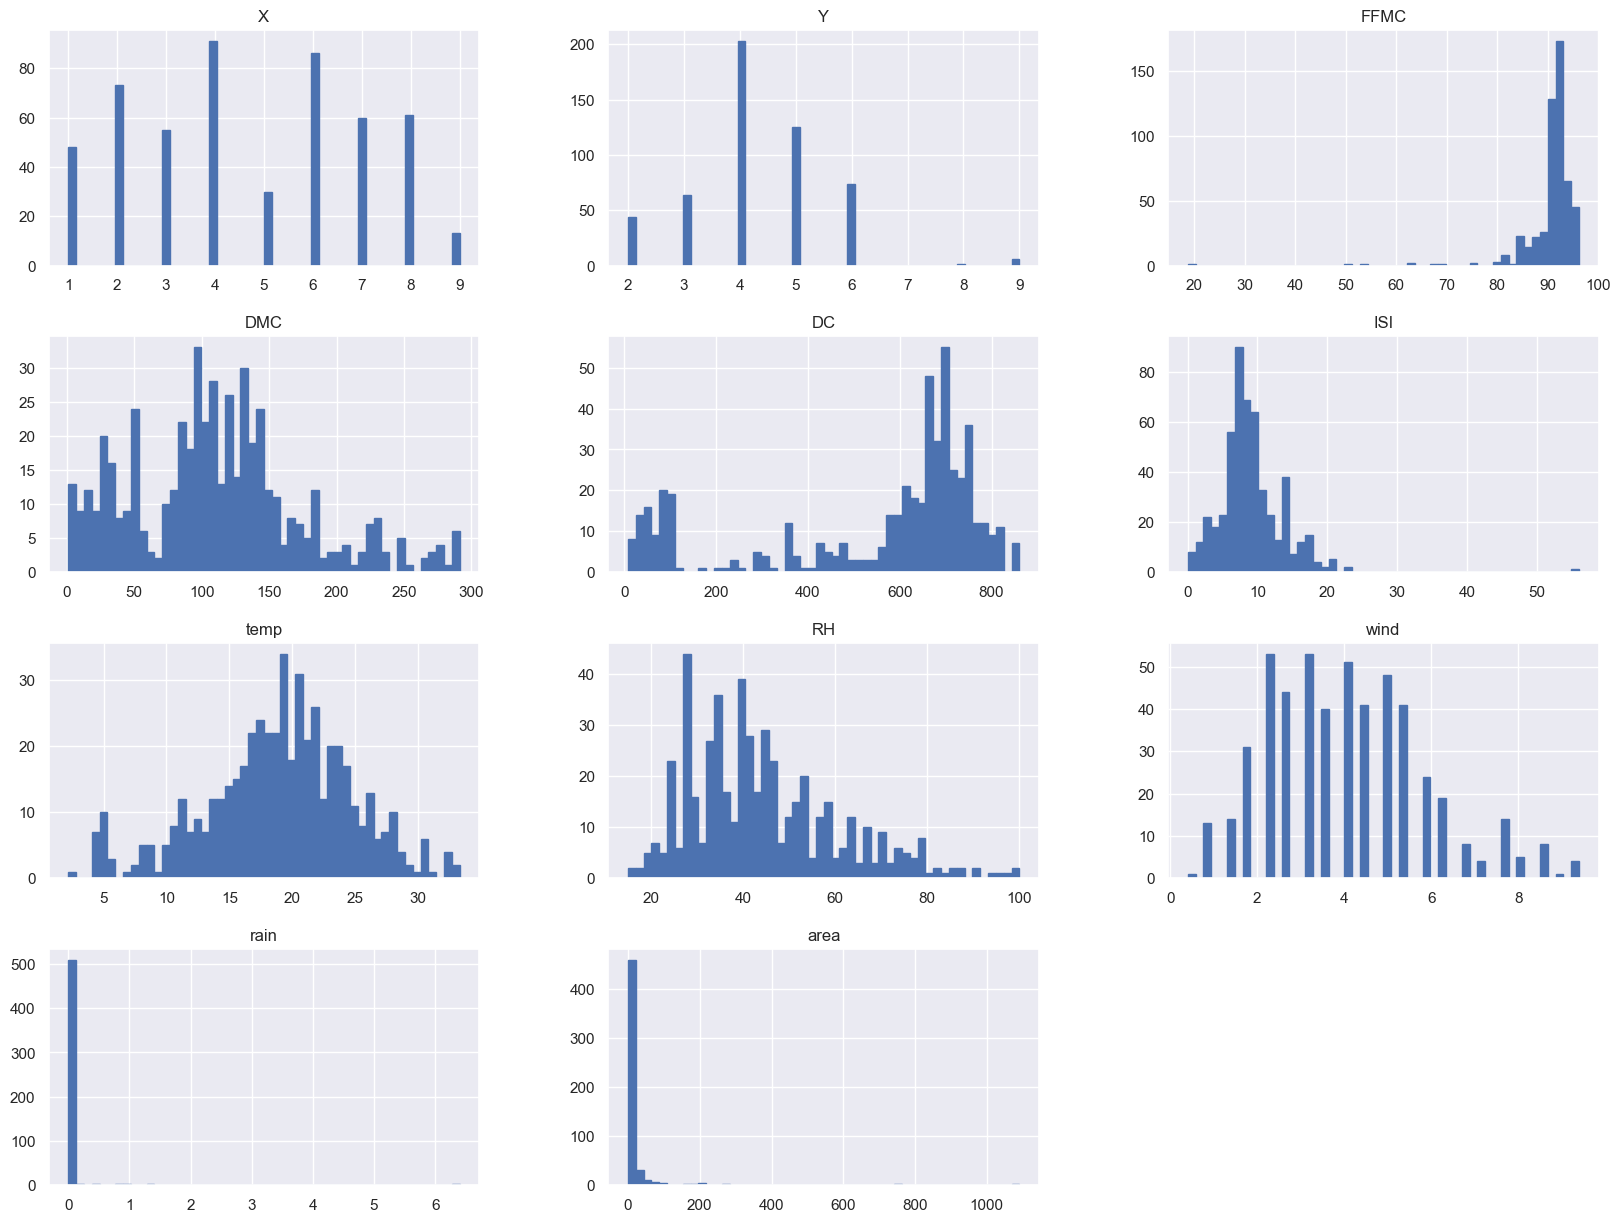

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()  # Apply Seaborn's default theme
data.hist(bins=50, figsize=(20, 15), ec='b')
plt.show()


In [67]:
print(data.head())
print(data.info())  # Check data types and find categorical columns


   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...      False   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...      False   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...      False   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...      False   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...      False   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0      False      False     True    False    False    False    False    False   
1       True      False    False    False    False    False    False     True   
2       True      False    False    False     True    False    False    False   
3      False      False     True    False    False    False    False    False   
4      False      False    False    False    False     True    False    False   

   day_wed  
0    False  
1    False  
2    False  
3    False  
4    Fals

In [68]:
print(data.columns)  # Display column names


Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')


In [9]:
percentage = data['month_apr'].value_counts(normalize=True) * 100
print(percentage)


month_apr
False    98.259188
True      1.740812
Name: proportion, dtype: float64


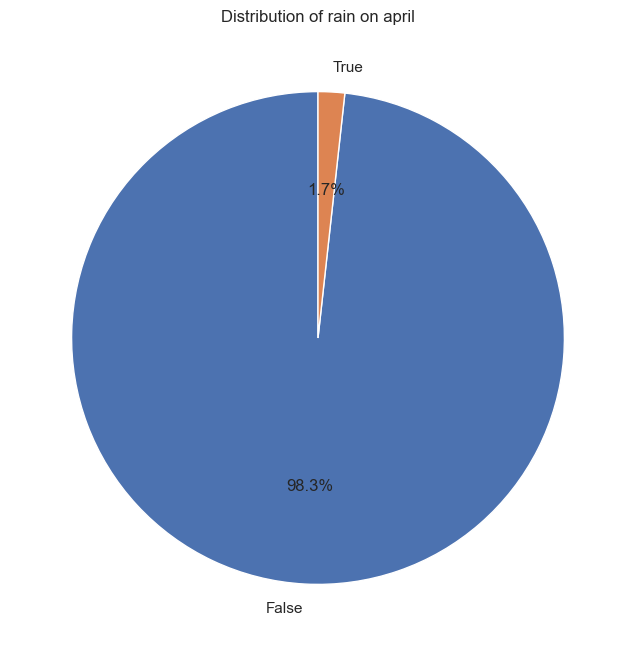

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    percentage, 
    labels=percentage.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Distribution of rain on april')
plt.show()

In [10]:
percentage = data['month_aug'].value_counts(normalize=True) * 100
print(percentage)


month_aug
False    64.410058
True     35.589942
Name: proportion, dtype: float64


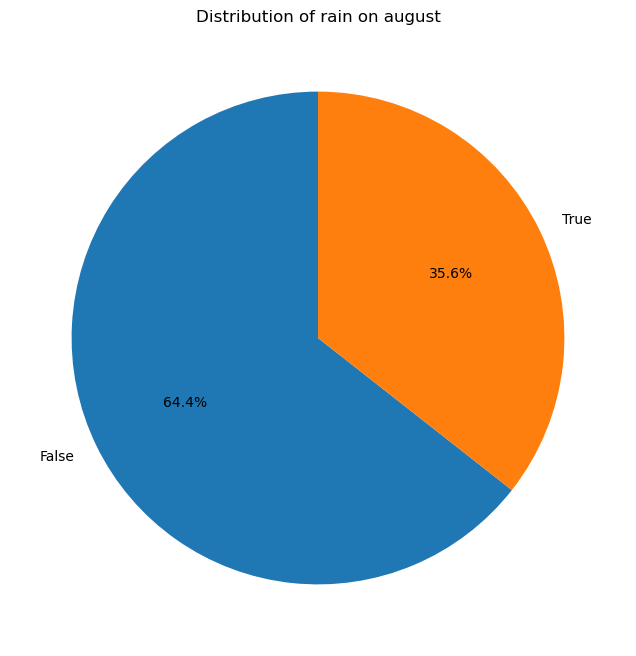

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    percentage, 
    labels=percentage.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Distribution of rain on august')
plt.show()

In [12]:
import pandas as pd

data = pd.read_csv('forestfires.csv')  # Replace with your dataset's filename or path

print(data.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


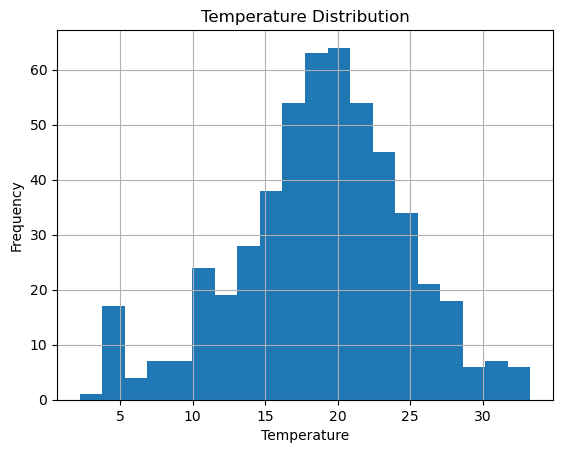

In [13]:
import matplotlib.pyplot as plt

data['temp'].hist(bins=20)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()


In [14]:
data['wind_temp_ratio'] = data['wind'] / (data['temp'] + 1) 

data['temp_normalized'] = (data['temp'] - data['temp'].mean()) / data['temp'].std()


In [15]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

print(data.isnull().sum())


X                  0
Y                  0
month              0
day                0
FFMC               0
DMC                0
DC                 0
ISI                0
temp               0
RH                 0
wind               0
rain               0
area               0
wind_temp_ratio    0
temp_normalized    0
dtype: int64


In [77]:
numeric_data = data.select_dtypes(include=["number"])

data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())


In [78]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

print(data.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

   wind_temp_ratio  temp_normalized  
0         0.728261        -1.840857  
1         0.047368        -0.153130  
2         0.083333        -0.738668  
3         0.430108        -1.823636  
4         0.145161        -1.289763  


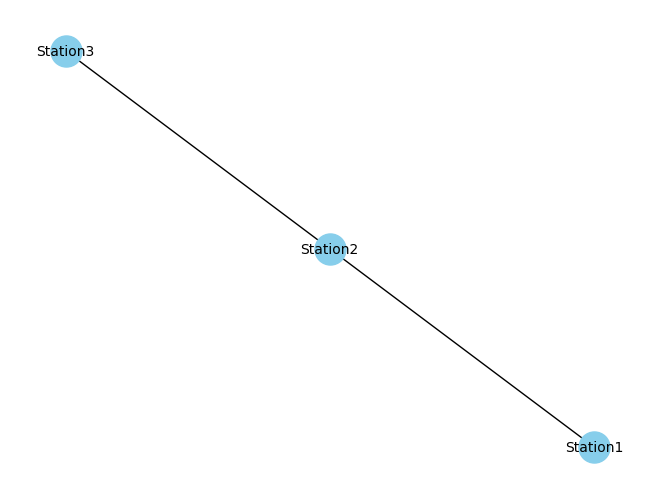

In [16]:
import networkx as nx

G = nx.Graph()
stations = ['Station1', 'Station2', 'Station3']
G.add_edges_from([('Station1', 'Station2'), ('Station2', 'Station3')])

nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = data[['temp', 'RH', 'wind', 'rain']]
y = data['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))


Mean Squared Error: 12212.568966112081


In [18]:
import pandas as pd

df = pd.read_csv("forestfires.csv")

print(df.head())

print(df.columns)


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [82]:
df.columns = df.columns.str.strip()


In [19]:
if 'Classes' in df.columns and 'month' in df.columns:

    dftemp = df.loc[df['Region'] == 1]

 
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.subplots(figsize=(13, 6))
    sns.set_style('whitegrid')

    sns.countplot(
        x='month', hue='Classes', data=dftemp, ec='black', palette='Set2'
    )

    plt.title('Fire Analysis Month-wise for Bejaia Region', fontsize=18, weight='bold')
    plt.ylabel('Count', weight='bold')
    plt.xlabel('Months', weight='bold')
    plt.legend(loc='upper right')
    plt.xticks([0, 1, 2, 3], ['June', 'July', 'August', 'September'])
    plt.grid(alpha=0.5, axis='y')
    plt.show()
else:
    print("Check your dataset. 'Classes' or 'month' column not found.")


Check your dataset. 'Classes' or 'month' column not found.


In [20]:
import pandas as pd

df = pd.read_csv("forestfires.csv")

print("Columns:", df.columns)
print(df.head())


Columns: Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [85]:
df.columns = df.columns.str.strip()

df = df.rename(columns={
    'Class': 'Classes',  
    'Month': 'month'      
})

print("Updated Columns:", df.columns)


Updated Columns: Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


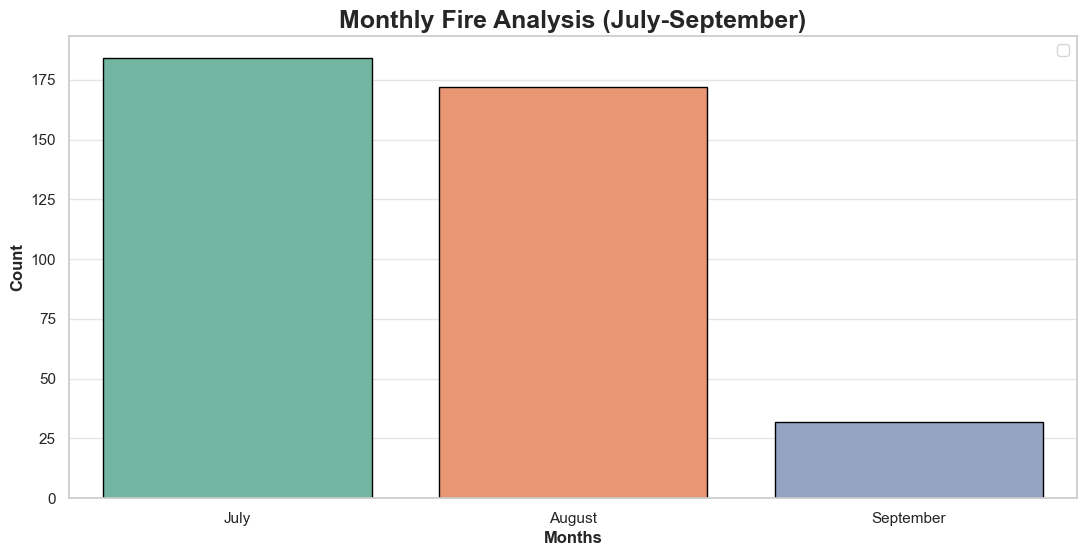

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_filtered = data.loc[data['month'].isin(['jul', 'aug', 'sep'])]

plt.figure(figsize=(13, 6))
sns.set_style('whitegrid')

sns.countplot(x='month', data=df_filtered, ec='black', palette='Set2')

plt.title('Monthly Fire Analysis (July-September)', fontsize=18, weight='bold')
plt.ylabel('Count', weight='bold')
plt.xlabel('Months', weight='bold')

plt.xticks(np.arange(3), ['July', 'August', 'September'])
plt.legend(loc='upper right')
plt.grid(alpha=0.5, axis='y')
plt.show()


In [87]:
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'wind_temp_ratio', 'temp_normalized'],
      dtype='object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_10536\3609815914.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_feature = data.groupby(group_feature, as_index=False)['area'].sum()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


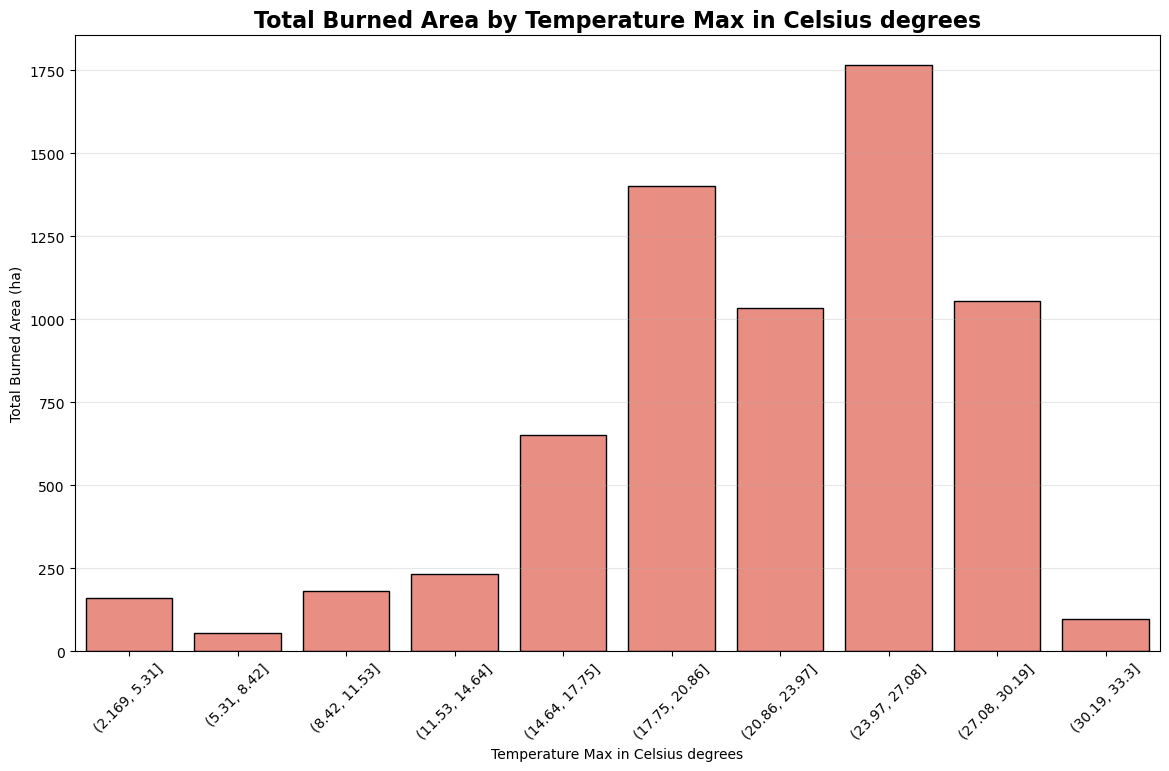

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def barchart(feature, xlabel, bins=None):
    
    plt.figure(figsize=[14, 8])

    if bins:
        data['binned_feature'] = pd.cut(data[feature], bins=bins)
        group_feature = 'binned_feature'
    else:
        group_feature = feature

    by_feature = data.groupby(group_feature, as_index=False)['area'].sum()

    ax = sns.barplot(x=group_feature, y="area", data=by_feature, estimator=sum, color='salmon', edgecolor='black')
    ax.set(xlabel=xlabel, ylabel='Total Burned Area (ha)')
    
    plt.title(f'Total Burned Area by {xlabel}', fontsize=16, weight='bold')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

barchart('temp', 'Temperature Max in Celsius degrees', bins=10)


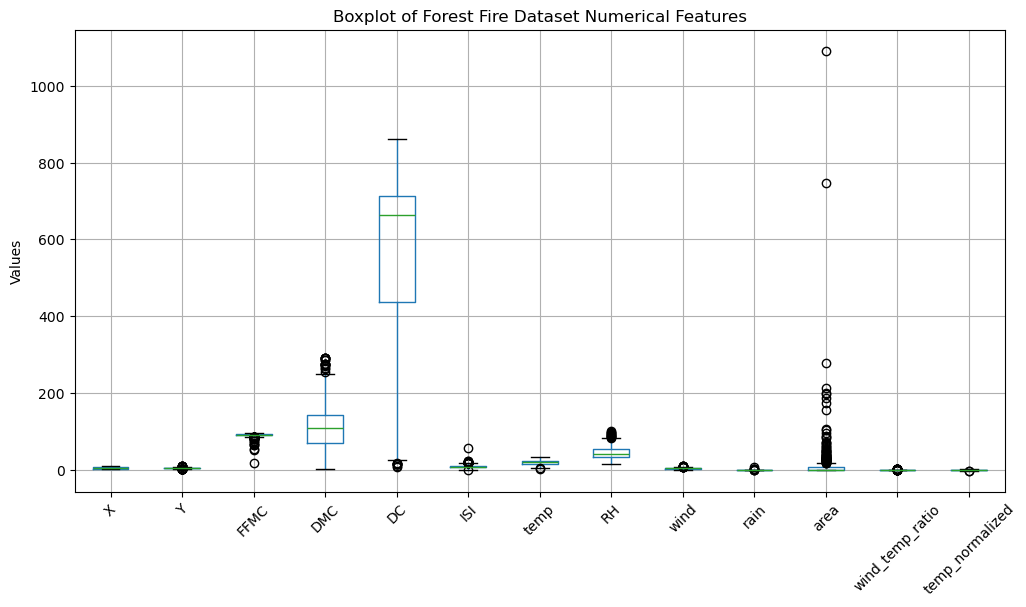

In [22]:
import matplotlib.pyplot as plt

df_numerical = data.drop(['month', 'day'], axis=1)

fig = plt.figure(figsize=(12, 6))
ax = df_numerical.boxplot()
ax.set_title("Boxplot of Forest Fire Dataset Numerical Features")
ax.set_ylabel("Values")
plt.xticks(rotation=45)
plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


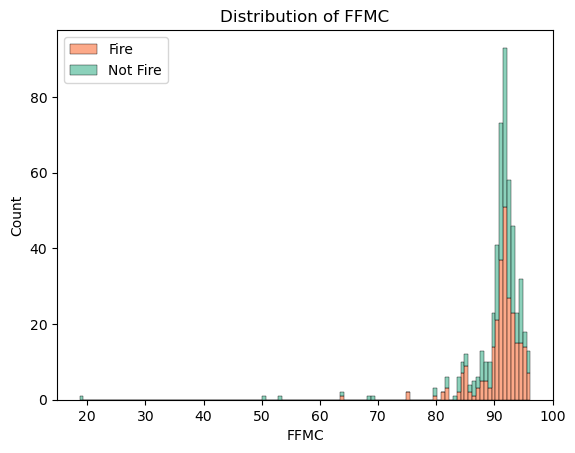

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


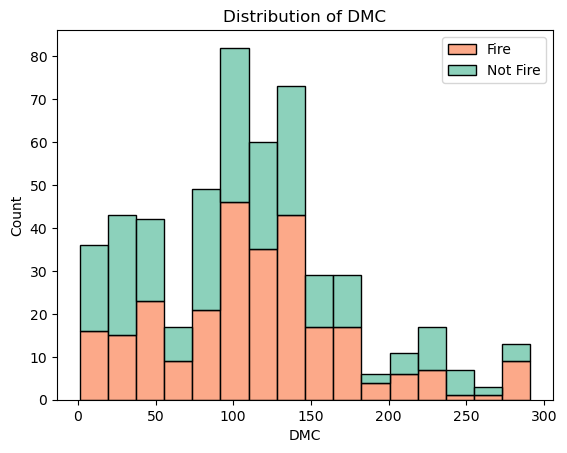

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


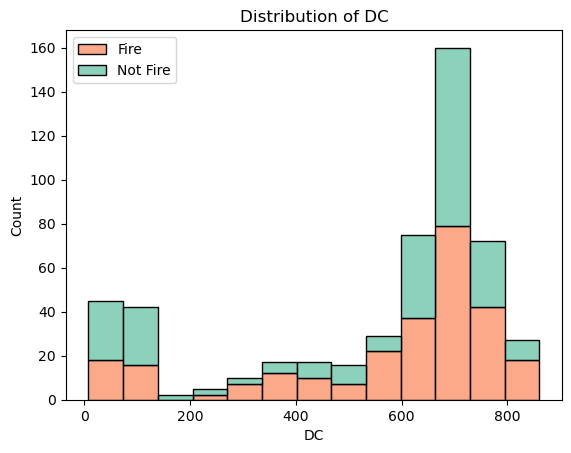

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


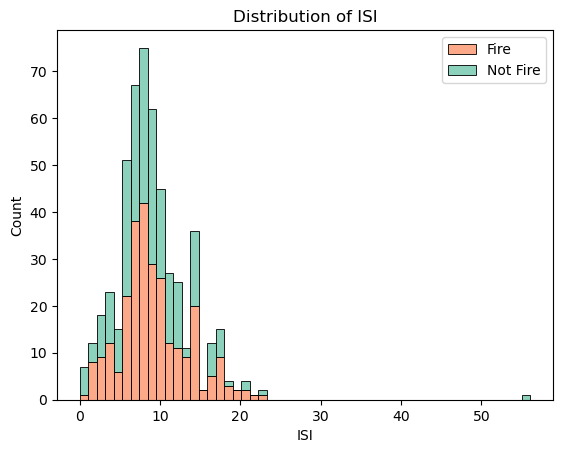

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


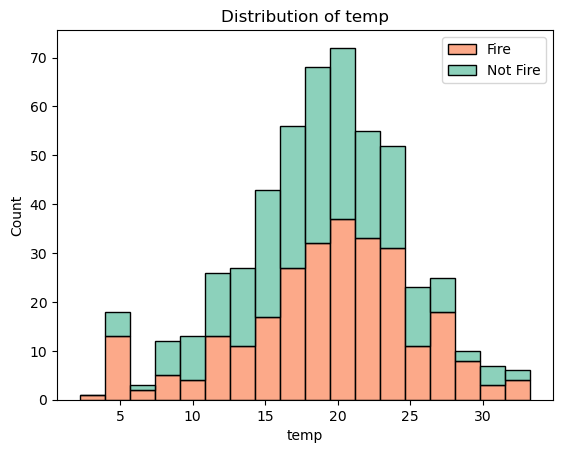

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


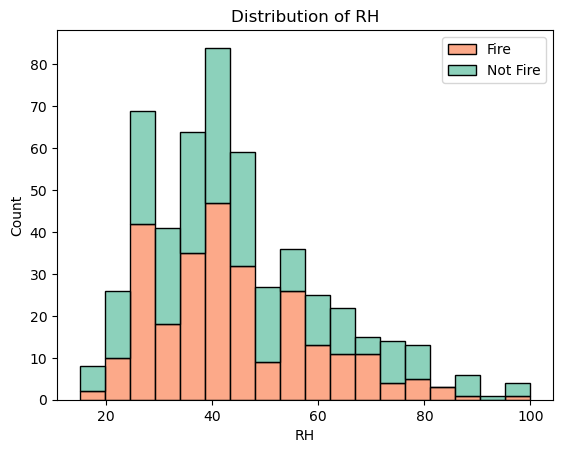

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


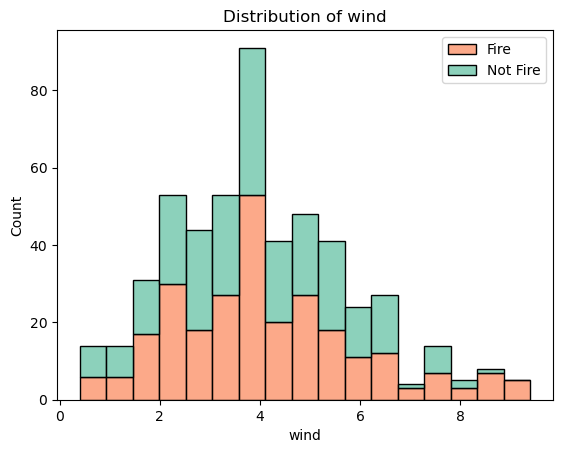

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


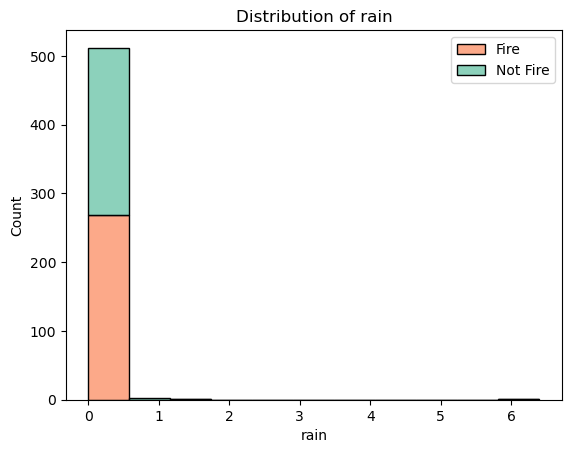

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data['FireStatus'] = data['area'].apply(lambda x: 'Fire' if x > 0 else 'Not Fire')

df_temp = data.drop(['month', 'day', 'X', 'Y', 'FireStatus'], axis=1)

for feature in df_temp.columns:
    sns.histplot(data=data, x=feature, hue='FireStatus', multiple="stack", palette="Set2")
    plt.legend(labels=['Fire', 'Not Fire'])
    plt.title(f"Distribution of {feature}")
    plt.show()
